In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [28]:
# Data Loaded and Data Clean Up: DateTime column converted to DateTime DataType and job_skills column skills were string Converted to List

# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()
# Give (#) to the df below and and then remove (#) from the above (dataset & df) to review the Data on your device 

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_date_month'] = df['job_posted_date'].dt.month

In [32]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [36]:
df_DA_US_exp = df_DA_US.explode('job_skills')

In [38]:
df_pivot=df_DA_US_exp.pivot_table(index='job_posted_date_month', columns='job_skills', aggfunc='size', fill_value=0)

In [39]:
df_pivot.loc['Total'] = df_pivot.sum()

In [46]:
df_pivot=df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

In [ ]:
df_pivot.drop('Total', inplace=True)

In [53]:
df_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_date_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [58]:
DA_totals = df_DA_US.groupby('job_posted_date_month').size()
DA_totals

job_posted_date_month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [62]:
df_piv_perc = df_pivot.div(DA_totals/100,axis=0)

In [65]:
df_piv_perc.reset_index(inplace=True)

In [71]:
df_piv_perc['Month'] = pd.to_datetime(df_piv_perc['job_posted_date_month'], format='%m').dt.month_name()

In [73]:
df_piv_perc.set_index('Month', inplace=True)
df_piv_perc.drop(columns=['job_posted_date_month'], inplace=True)

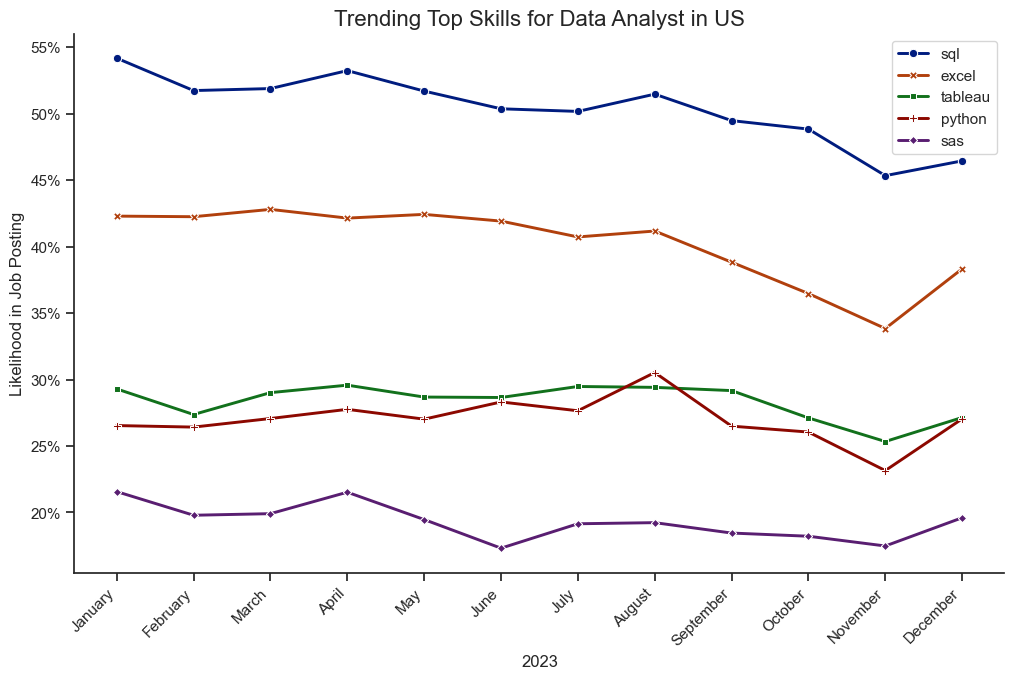

In [135]:
df_plot = df_piv_perc.iloc[:,:5]
plt.figure(figsize=(12,7))
sns.lineplot(df_plot, dashes=False, palette='dark', linewidth=2.1, markers=True)
sns.set_theme(style='ticks')
sns.despine()

plt.xticks(rotation=45, ha='right')
plt.title('Trending Top Skills for Data Analyst in US', fontsize=16)
plt.xlabel(2023)
plt.ylabel('Likelihood in Job Posting')
plt.legend()
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y)}%'))


plt.show()